In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
## Do countries with higher proportion of older people (older tha 64) have more covid-19 deaths?

In [3]:
## Reading and cleaning covid_19 data
covid = pd.read_csv('datasets/covid-19.csv')

In [4]:
## Reading and cleaning older population percentage data for each country
oldpop_raw = pd.read_csv('datasets/population_64+_data/data.csv')
oldpop = oldpop_raw[['Country Name', '2018']]
oldpop = oldpop.rename(columns = {'Country Name':'Country', '2018':'PopulationOver64(%)'})

In [5]:
## Reading and cleaning population size data for each country
population_raw = pd.read_csv('datasets/population.csv')
population = population_raw[['Country', 'Year_2016']]
population = population.rename(columns = {'Year_2016':'PopulationSize'})

In [6]:
## Reading and cleaning testing data 
testing_raw = pd.read_csv('datasets/testing.csv')
testing = testing_raw[['Country or region', 'Tests']]
testing = testing.rename(columns = {'Country or region':'Country'})
testing = testing.loc[~testing['Tests'].isnull()]

In [7]:
## Defining function that eliminates commas from Tests and converts the to float. 
def conversion(test):
    return float(test.replace(',', ''))

In [8]:
testing['Tests'] = testing['Tests'].apply(conversion)

In [9]:
## Merging all the datasets by county name
deathage = covid.merge(oldpop, how = 'inner', left_on = 'Country', right_on = 'Country').merge(population, how = 'inner', left_on = 'Country', right_on = 'Country').merge(testing, how = 'left', left_on = 'Country', right_on = 'Country')

In [10]:
deathage.head(20)

,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,PopulationOver64(%),PopulationSize,Tests
0,Afghanistan,70,784,2,25,3,43,2.584927,34656032.0,NaN
1,Albania,19,494,1,25,3,251,13.744736,2876101.0,4558.0
2,Algeria,90,2160,10,336,17,708,6.362497,40606052.0,NaN
3,American Samoa,0,0,0,0,0,0,NaN,55599.0,NaN
4,Andorra,14,673,2,33,41,169,NaN,77281.0,NaN
5,Angola,0,19,0,2,0,5,2.216374,28813463.0,NaN
6,Antigua and Barbuda,0,23,0,2,0,3,8.799826,100963.0,NaN
7,Argentina,166,2443,9,111,37,596,11.117789,43847430.0,18027.0
8,Armenia,44,1111,1,17,32,297,11.253818,2924816.0,6484.0
9,Aruba,0,0,0,0,0,0,13.550947,104822.0,NaN


In [11]:
## Defining fuction that calculates deaths per 100,000 people 
def dthousand(series):
    return (series[4]/series[8])*100000

## Defining function that calcualted tests taken per 100,000 people
def tthousand(series):
    return (series[9]/series[8])*100000

In [12]:
## Creating new column for deaths per 100,000 people
deathage.loc[(~deathage['PopulationSize'].isnull()), 'DeathsPer100K'] = deathage.loc[~deathage['PopulationSize'].isnull()].apply(dthousand, axis = 1)

In [13]:
## Creating new column for tests taken per 100,000 people
deathage.loc[(~deathage['PopulationSize'].isnull()), 'TestsPer100K'] = deathage.loc[(~deathage['PopulationSize'].isnull())].apply(tthousand, axis = 1)

Text(0.5, 1.0, 'Relationship Between Older Population Percentage and Covid-19 Caused Deaths Per Country')

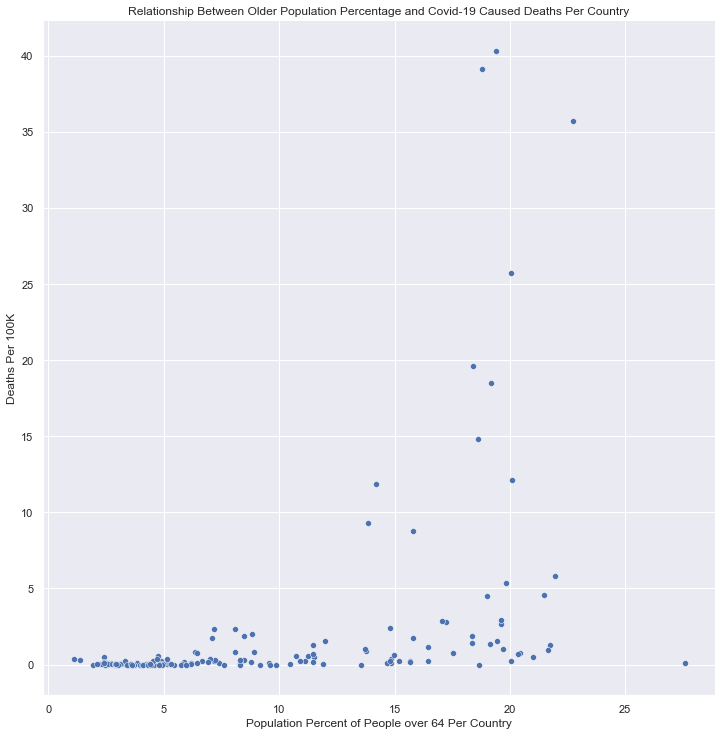

In [14]:
## Creating scatterplot that visualizes the relationship between countries' older population proportion and covid-19 death count 
sns.set()
deathageplot = sns.relplot(x='PopulationOver64(%)', y='DeathsPer100K', data=deathage, height=10)
deathageplot.set_axis_labels(x_var="Population Percent of People over 64 Per Country", y_var="Deaths Per 100K")
plt.title('Relationship Between Older Population Percentage and Covid-19 Caused Deaths Per Country')

Text(0.5, 1.0, 'Linear Regression Between Older Population Percentage and Covid-19 Caused Deaths Per Country')

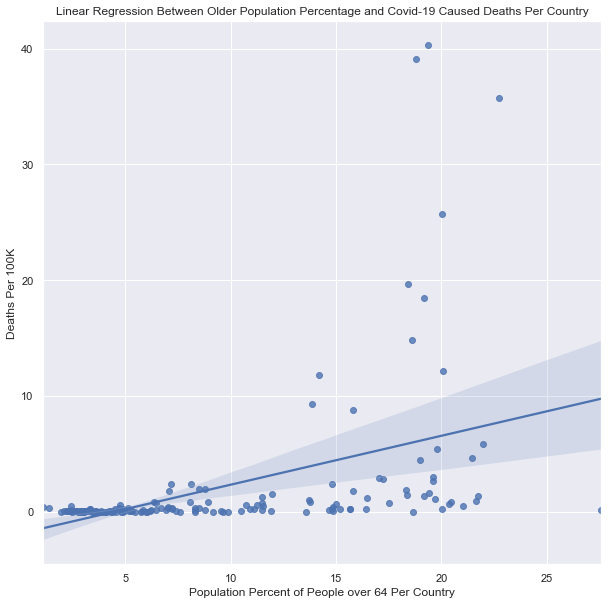

In [15]:
plt.figure(figsize=(10,10))
deathageplot = sns.regplot(x='PopulationOver64(%)', y='DeathsPer100K', data=deathage)
deathageplot.set(xlabel="Population Percent of People over 64 Per Country", ylabel="Deaths Per 100K")
plt.title('Linear Regression Between Older Population Percentage and Covid-19 Caused Deaths Per Country')

In [17]:
## Checking the number of tests taken in countries with older population.
popAgeTests = deathage.copy()
popAgeTests = popAgeTests[['Country', 'PopulationSize', 'PopulationOver64(%)', 'TestsPer100K', 'DeathsPer100K']].sort_values(by = ['PopulationOver64(%)'], ascending=False)

Text(0.5, 1.0, 'Relationship Between Older Population Percentage and Number of Tests Taken by Country')

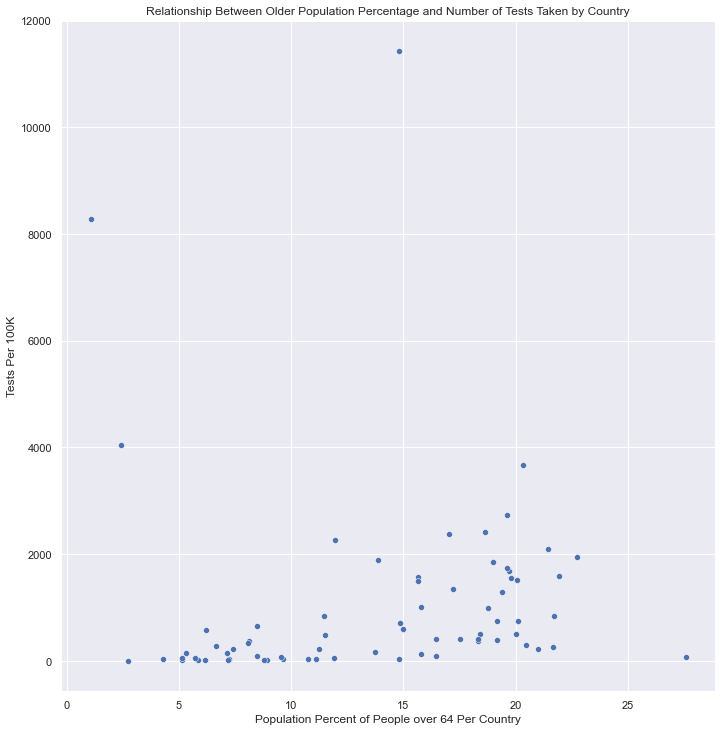

In [18]:
##Creating a scatterplot that shows relationship between number of tests taken per 100k people and older population percentage.
deathageplot = sns.relplot(x='PopulationOver64(%)', y='TestsPer100K', data=popAgeTests, height=10)
deathageplot.set_axis_labels(x_var="Population Percent of People over 64 Per Country", y_var="Tests Per 100K")
plt.title('Relationship Between Older Population Percentage and Number of Tests Taken by Country')

In [19]:
popAgeTests[['Country', 'PopulationSize', 'PopulationOver64(%)', 'TestsPer100K']].head(20)

,Country,PopulationSize,PopulationOver64(%),TestsPer100K
86,Japan,126994511.0,27.576370,79.297128
84,Italy,60600590.0,22.751680,1944.540474
138,Portugal,10324611.0,21.953858,1584.718301
58,Finland,5495096.0,21.720788,837.110034
66,Greece,10746740.0,21.655272,265.978334
63,Germany,82667685.0,21.461962,2090.728681
28,Bulgaria,7127822.0,21.021914,223.055514
42,Croatia,4170600.0,20.445433,295.449096
106,Malta,436947.0,20.349324,3665.433107
162,Sweden,9903122.0,20.095525,753.297798


In [20]:
#######################################################################

In [21]:
## Creating a new dataframe for analysing disproportionality of testing count and population size 
disprop_raw = deathage.copy()
disprop_raw = disprop_raw[['Country', 'PopulationSize', 'Tests', 'TestsPer100K']]
disprop = disprop_raw.loc[~disprop_raw['Tests'].isnull()]

In [22]:
## Dropping PopulationSize and Tests outliers to better graph the relationship
nooutliers = disprop.copy()
nooutliers = nooutliers[nooutliers.Country != 'India'][nooutliers.Country != 'United States'][nooutliers.Country != 'Germany']

<ipython-input-22-5e7d31241a1c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nooutliers = nooutliers[nooutliers.Country != 'India'][nooutliers.Country != 'United States'][nooutliers.Country != 'Germany']


Text(0.5, 1.0, 'Relationship Between Population Size And Number of Tests Performed')

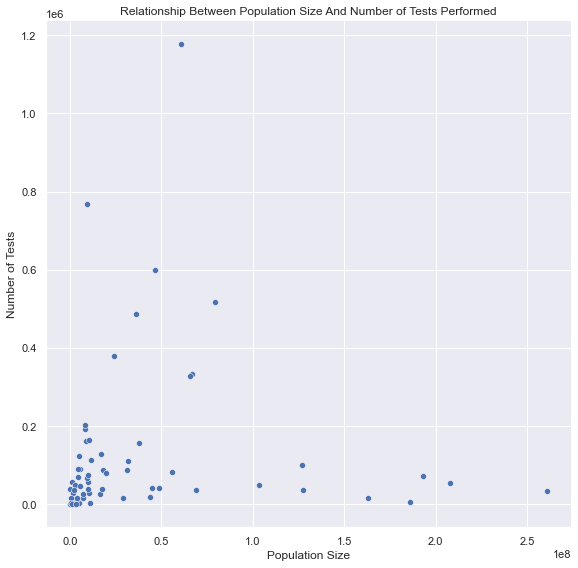

In [23]:
## Graphing scatterplot of PopulationSize and Tests to identify whether there are countries with large population 
## that haven't tested many citizens and therefore skew the results of the previous graph
testingplot = sns.relplot(x='PopulationSize', y='Tests', data=nooutliers, height=8)
testingplot.set_axis_labels(x_var="Population Size", y_var="Number of Tests")
plt.title('Relationship Between Population Size And Number of Tests Performed')

In [25]:
## Creating dataframe for obserivng testing amount in tensely populated countires
largePopTesting = disprop.copy()
largePopTesting = largePopTesting.loc[disprop['PopulationSize'] > 50000000]


largePopTesting['PopulationSize'] = np.log(largePopTesting['PopulationSize'])
largePopTesting['TestsPer100K'] = np.log(largePopTesting['TestsPer100K'])

Text(0.5, 1.0, 'Relationship Between Population Size And Number of Tests Performed Among Countries With Larger Populations')

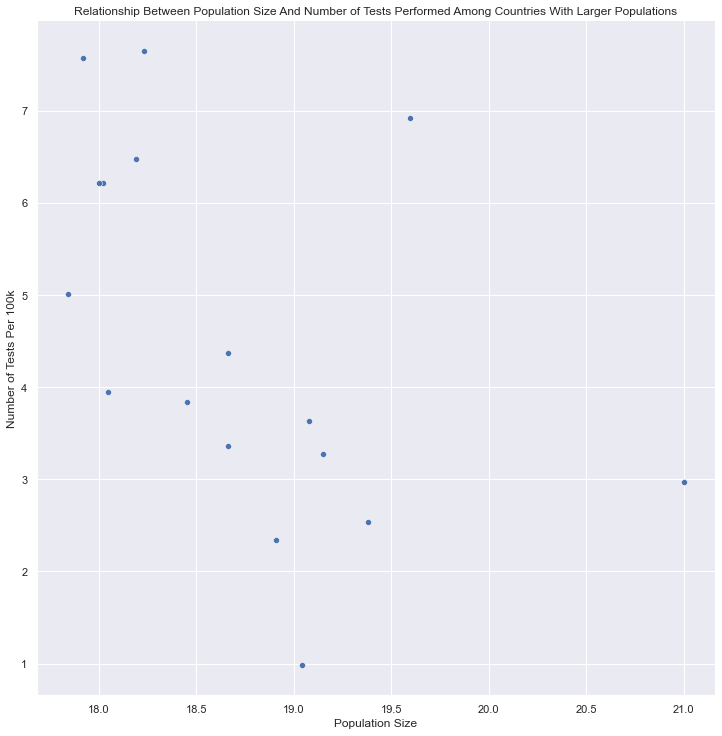

In [26]:
## Graphing Population Size vs Tests among countries with larger populations
largePopGraph = sns.relplot(x='PopulationSize', y='TestsPer100K', data=largePopTesting, height=10)
largePopGraph.set_axis_labels(x_var="Population Size", y_var="Number of Tests Per 100k")
plt.title('Relationship Between Population Size And Number of Tests Performed Among Countries With Larger Populations')

In [27]:
##Checking the average testing amount among countries with learger population.
largePopTesting['TestsPer100K'].describe()

count    17.000000
mean      4.548382
std       1.979262
min       0.988917
25%       3.273430
50%       3.942576
75%       6.212845
max       7.645268
Name: TestsPer100K, dtype: float64

/Users/kristofersiimar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Tests Taken by Countries With Larger Population')

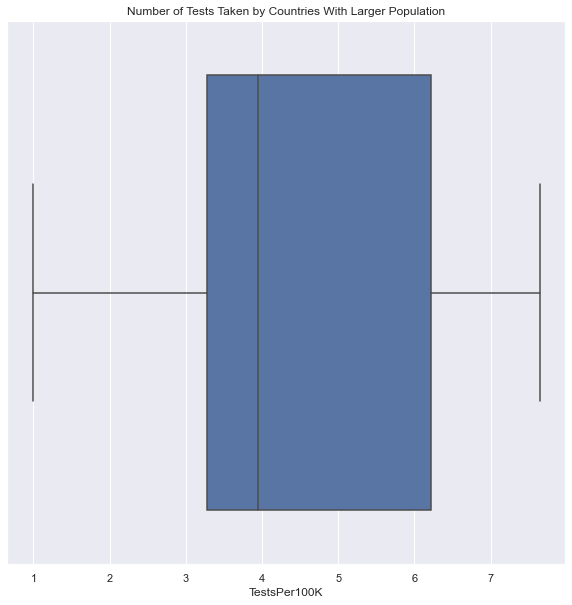

In [28]:
## Creating a boxpolt that visualized number of tests taken in countries with larger populations.
plt.figure(figsize=(10, 10))
boxplot = sns.boxplot('TestsPer100K', data=largePopTesting)
plt.title('Number of Tests Taken by Countries With Larger Population')